<div style="background-color:ghostwhite;padding:10px;margin-bottom: 25px">
    <h2 style="color:black;text-align:center;">Notebook for the Moroccan Finance Dashboard</h2>
    <p style="color:black;text-align:center;" > Is the Stock Market efficient ? </p>
</div>

In [1]:
import numpy as np
import pandas as pd
import streamlit as st
import altair as alt
import investpy
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Today = datetime.today().strftime('%d/%m/%Y')

df = investpy.indices.get_index_historical_data(index='Moroccan All Shares',
                                        country='Morocco',
                                        from_date='01/01/2015',
                                        to_date=Today)    
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2015-01-02,9565.92,9643.19,9565.92,9643.19,0,MAD
2015-01-06,9644.78,9651.78,9610.50,9651.78,0,MAD
2015-01-07,9644.21,9751.01,9628.49,9750.30,0,MAD
2015-01-08,9745.36,9804.37,9699.88,9803.87,0,MAD
2015-01-09,9822.10,9993.19,9810.87,9993.19,0,MAD
...,...,...,...,...,...,...
2021-05-05,11910.59,11964.70,11909.06,11954.30,0,MAD
2021-05-06,11954.30,12034.51,11953.75,12009.95,0,MAD
2021-05-07,12009.95,12020.46,11992.56,12012.39,0,MAD


In [2]:
Date = df.index
df['Date']=Date
chart = alt.Chart(df).mark_line().encode(
    x=alt.X('Date',axis=alt.Axis(format='%Y-%m',labelAngle=-20)),
    y=alt.Y('Close',scale=alt.Scale(domain=[np.min(df.Close), np.max(df.Close)])), 
).properties(width=700, height=300)
chart

2021-05-11 15:11:26.676 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


alt.Chart(...)

In [3]:
Return = []

for i in range(1,len(df)):
    c = (df.Close[i]-df.Close[i-1])/df.Close[i-1]
    Return.append(c)
    
len(Return), len(df.Close)

(1579, 1580)

In [4]:
df = df.iloc[1:]
df['Return'] = Return
df.head(3)

,Open,High,Low,Close,Volume,Currency,Date,Return
Date,,,,,,,,
2015-01-06,9644.78,9651.78,9610.50,9651.78,0,MAD,2015-01-06,0.000891
2015-01-07,9644.21,9751.01,9628.49,9750.30,0,MAD,2015-01-07,0.010207
2015-01-08,9745.36,9804.37,9699.88,9803.87,0,MAD,2015-01-08,0.005494


In [5]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X('Date',axis=alt.Axis(format='%Y-%m',labelAngle=-20)),
    y=alt.Y('Return',scale=alt.Scale(domain=[np.min(df.Return), np.max(df.Return)])), 
).properties(width=700, height=300)
chart

alt.Chart(...)

In [6]:
from statsmodels.tsa.stattools import adfuller
X = df.Close
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.676169
p-value: 0.443431
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


In [7]:
X = df.Return
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.292841
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


In [8]:
df['Difference'] = df['Close'].diff()
X = df.Difference[1:]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.011956
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


In [9]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X('Date',axis=alt.Axis(format='%Y-%m',labelAngle=-20)),
    y=alt.Y('Difference',scale=alt.Scale(domain=[np.min(df.Difference), np.max(df.Difference)])), 
).properties(width=700, height=300)
chart

alt.Chart(...)

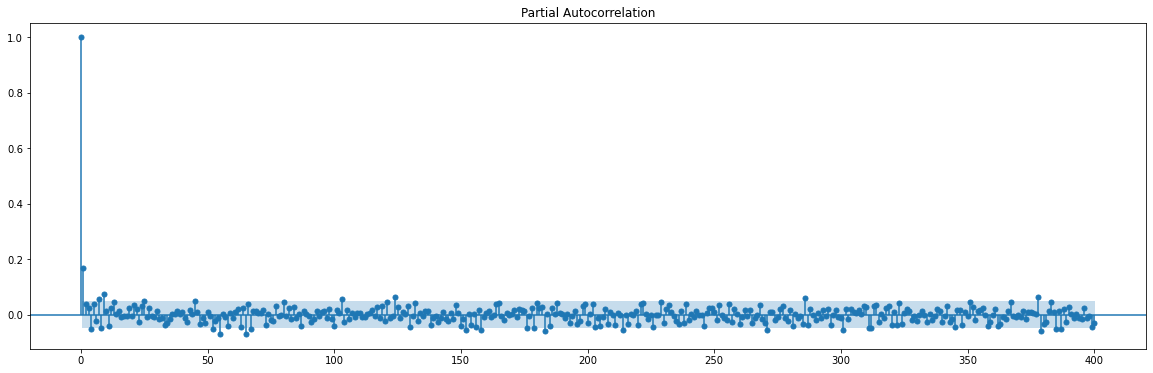

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
MASI_diff_1 = df.Difference[1:]
fig, ax = plt.subplots(figsize=(20, 6))
plot_pacf(MASI_diff_1, lags=400, ax=ax)
plt.show()

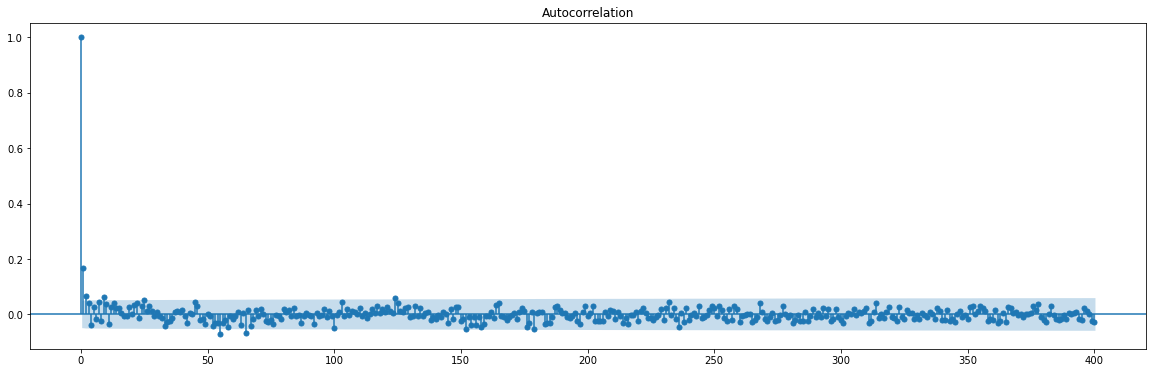

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
plot_acf(MASI_diff_1, lags=400, ax=ax)
plt.show()

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.Close, order=(3,1,2))
model_fit = model.fit()
model_fit.summary()  
# AIC= 18183.051   order= 2-1-2
# AIC=18179.577    order= 3-1-2
# AIC=18201.125    order= 4-1-4
# AIC=18192.279    order= 4-1-2
# AIC=18193.127    order= 3-1-4

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1579
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -9094.576
Date:                Tue, 11 May 2021   AIC                          18201.152
Time:                        15:20:35   BIC                          18233.336
Sample:                             0   HQIC                         18213.111
                               - 1579                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1697      0.108    -10.859      0.000      -1.381      -0.959
ar.L2         -0.2143      0.086     -2.488      0.013      -0.383      -0.045
ar.L3          0.1499      0.017      8.866      0.000       0.117       0.183
ma.L1          1.3407      0.110     12.137      0.000       1.124       1.557
ma.L2          0.4696      0.106      4.429      0.000       0.262       0.677
sigma2      5952.6249     68.462     86.948      0.000    5818.442    6086.808
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             37177.00
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.33   Skew:                            -0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

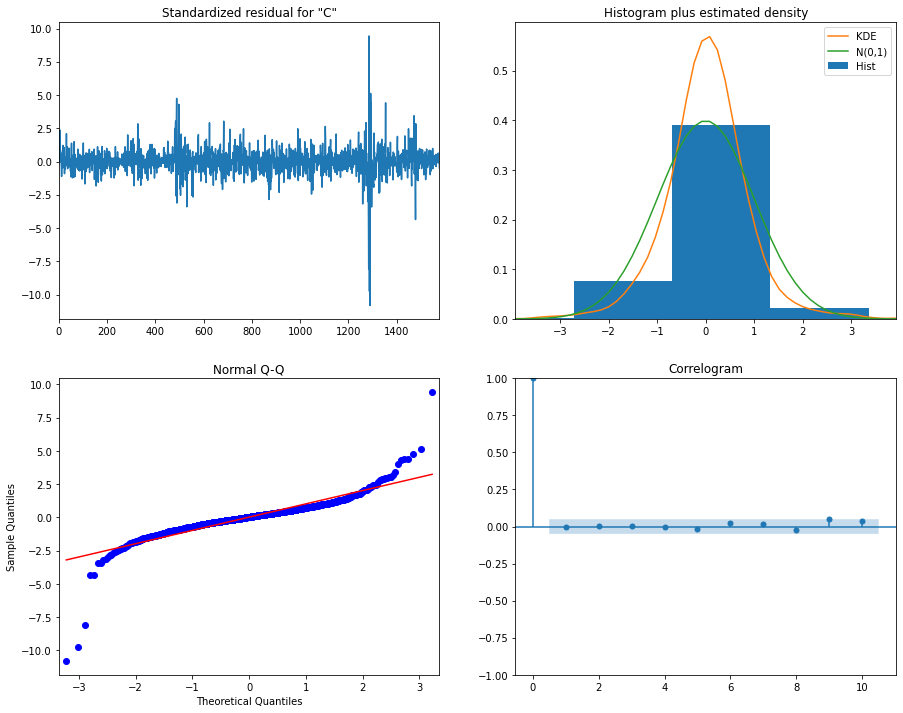

In [14]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

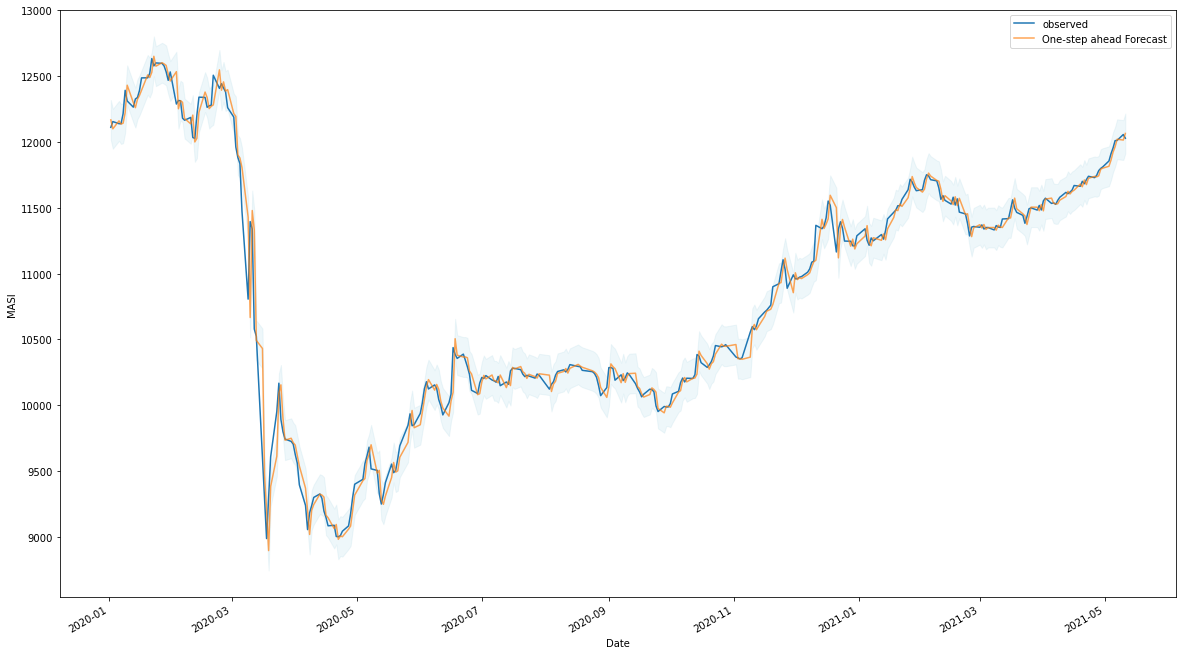

In [15]:
pred = model_fit.get_prediction(start=pd.to_datetime('2020-01-02'), dynamic=False)
pred_ci = pred.conf_int()

fig, ax = plt.subplots(figsize=(20, 12))
ax = df.Close['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='lightblue', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('MASI')
plt.legend()

plt.show()

In [20]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    return mape
print('Accuracy = ',str(100 - round(forecast_accuracy(pred.predicted_mean, df.Close) * 100,2)), '%')

Accuracy =  99.39 %


In [16]:
# Get forecast 500 steps ahead in future
pred_uc = model_fit.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [17]:
pred_ci

,lower Close,upper Close
1579,11871.750573,12174.185778
1580,11792.045395,12257.757119
1581,11721.937000,12317.285867
1582,11669.913222,12379.206786
1583,11619.603313,12420.786739
...,...,...
2074,7788.048786,16256.168480
2075,7783.778034,16260.439232
2076,7779.511582,16264.705685
2077,7775.249415,16268.967851


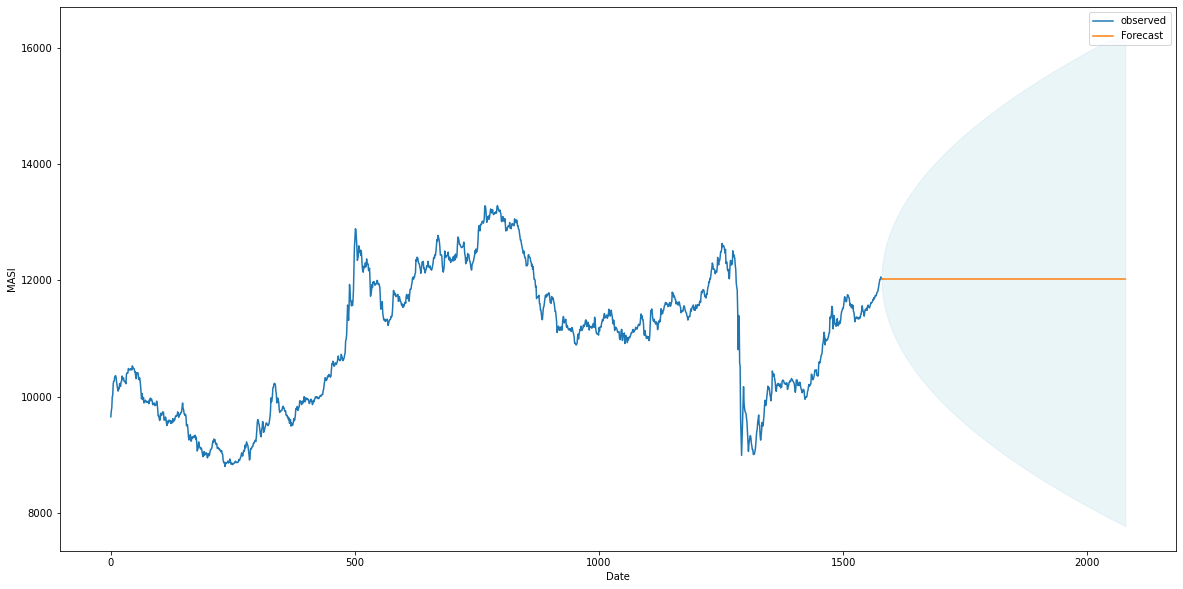

In [18]:
Close = df.Close.tolist()
data = pd.DataFrame({'Close':Close})
ax = data.Close.plot(label='observed', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='lightblue', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('MASI')

plt.legend()
plt.show()